<a href="https://colab.research.google.com/github/Saniya-Firdous/IIITH_AI-ML_Labs_and_Projects/blob/main/Clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Clustering*

# K-Means


K-means is a widely used clustering algorithm in machine learning that partitions a dataset into K clusters by iteratively assigning data points to the nearest cluster centroid and updating the centroids based on the mean of assigned points.

K-means is commonly employed in various fields for tasks such as image segmentation, customer segmentation, and pattern recognition due to its simplicity and effectiveness.

#Feature Scaling for K-Means

Feature scaling is generally essential for K-means clustering, much like many other machine learning algorithms. K-means relies on distance-based metrics, such as Euclidean distance, to determine the proximity of data points to cluster centroids.

When features have different scales or units, those with larger magnitudes can dominate the calculation of distances, leading to biased cluster assignments.Feature scaling, which involves transforming the features to a comparable scale, ensures that all features contribute equally to the distance computations.

Common techniques include standardization (scaling to zero mean and unit variance) or normalization (scaling to a specific range). Applying feature scaling helps improve the performance and convergence of the K-means algorithm, ensuring a more meaningful clustering.

**ALOGORITHM**

1. Initialization
2. Assign Data Points to Clusters
3. Update Cluster Centroids
4. Repeat Steps 2 and 3
5. Result


# Initialization variation in K-means


Initialization variation in K-means, often referred to as sensitivity to initial centroids, can impact the final clustering result. To mitigate this issue, several techniques have been proposed to improve the stability of K-means initialization:


1. **K-means++ Initialization:**

  The K-means++ algorithm selects initial centroids with a higher probability of being far from each other. This reduces the likelihood of converging to a suboptimal solution and improves the overall stability of the algorithm.

2. **Multiple Random Initializations:**

  Run the K-means algorithm multiple times with different random initializations and choose the result with the lowest sum of squared distances (within-cluster variance). This helps to reduce the impact of a single random initialization on the final outcome.

3. **Deterministic Initialization:**

  Use a deterministic initialization method to ensure consistent starting points across multiple runs. This can involve specifying fixed initial centroids or using a reproducible random seed for random initialization.

4. **Hierarchical K-means:**

  Employ a hierarchical version of K-means, where initial clusters are formed at different levels of granularity. This can provide a more stable starting point for the main K-means algorithm.

5. **K-means with Medoids (K-medoids):**

  Instead of using means as centroids, use actual data points (medoids) as initial cluster representatives. This approach can be less sensitive to outliers and may yield more stable results.

6. **Using Results from a Previous Run:**

  If available, use the centroids obtained from a previous run of the algorithm as initial centroids for subsequent runs. This can be effective if the data distribution and the number of clusters remain relatively stable.

# The training and testing complexity of KMeans

The K-means algorithm consists of two main steps: assigning data points to clusters and updating cluster centroids. The training complexity is primarily determined by the number of iterations until convergence. Let's break down the complexities of these steps:

1. **Assigning Data Points to Clusters:**

  For each data point, the distance to each of the K centroids needs to be calculated. This involves computing the Euclidean distance or another distance metric. This step has a time complexity of O(N * K * d), where N is the number of data points, K is the number of clusters, and d is the dimensionality of the data.

2. **Updating Cluster Centroids:**

  For each of the K clusters, the centroid needs to be updated by calculating the mean of the data points assigned to that cluster. This step has a time complexity of O(N * d * K), where N is the number of data points, d is the dimensionality of the data, and K is the number of clusters.

3. **Convergence:**

  The convergence of the algorithm depends on how many iterations are needed until the centroids no longer change significantly. The number of iterations is not fixed and can vary based on the dataset and initialization. In practice, the algorithm often converges within a small number of iterations.



*  The overall training complexity is often expressed as O
   (I * N * K * d), where I is the number of iterations.
*   The testing complexity is O(M * K * d), where M is the   number of new data points to be assigned.



# Implementation of KMeans and testing on Synthetic Datasets

In [29]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [30]:
# Generating Synthetic Data

k=2
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (500, 2)
Sample:
[[ 5.83801528 -9.29715058]
 [ 5.67102739 -9.76225984]
 [ 3.15598083  5.95298368]
 [ 3.87586762  5.94663718]
 [ 3.94478532  4.85652467]]


In [31]:
#DEFINE ALL THE FUNCTIONS & VARIABLES WE NEED TO DO CLUSTERING
#Create an empty dictionary to store the cluster name, centroid and points associated with the cluster.
clusters={}

def initializeClusterCentroids():
  #For each cluster, initialize its properties
  for i in range(k):
      center = np.random.randint(-8, 10, size= (X.shape[1],), )
      points = []

      cluster = {
          'center' : center,
          'points' : points,
          'color' : color[i]
      }
      clusters[i] = cluster #looping over clusters dictionary

#Calculate euclidean distance between v1 and v2
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

def assignPointsToCluster(clusters, X):
    for ix in range(X.shape[0]):#iterate for all datapoints

        #Foe each datapoint, find the distance to k centroids
        distance_of_i = []
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w
            #all the point with all the five (k) cluster centers
            distance_of_i.append(d)

        #Based on the distances to k centroid, pick which cluster to assign it to
        #here we want find the minimum distance of cluster centers
        cluster_to_choose = np.argmin(distance_of_i)
        clusters[cluster_to_choose]['points'].append(X[ix])

#STEP 3: UPDATE CLUSTER CENTROIDS
def updateCluster(clusters):
    for kx in range(k):
        cluster_points = clusters[kx]['points']

        cluster_points = np.array(cluster_points)
        #here pts are array of list but we want array of array so

        if len(cluster_points)>0:
            new_center = np.mean(cluster_points, axis=0) #axis is along rows so will
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge

In [32]:
#We need to visualize this too. Lets define a function that can do that!
def plotclusters(clusters, plot):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        cluster_color = clusters[kx]['color']
        cluster_center = clusters[kx]['center']
        cluster_points = np.array(cluster_points)

        #plotting points associated /nearest to the cluster centers
        if len(cluster_points) > 0:
          plot.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 2, c = cluster_color)

        plot.scatter(cluster_center[0], cluster_center[1], s = 250, c = cluster_color, marker="o")

Run and visualize how the clusters evolve.

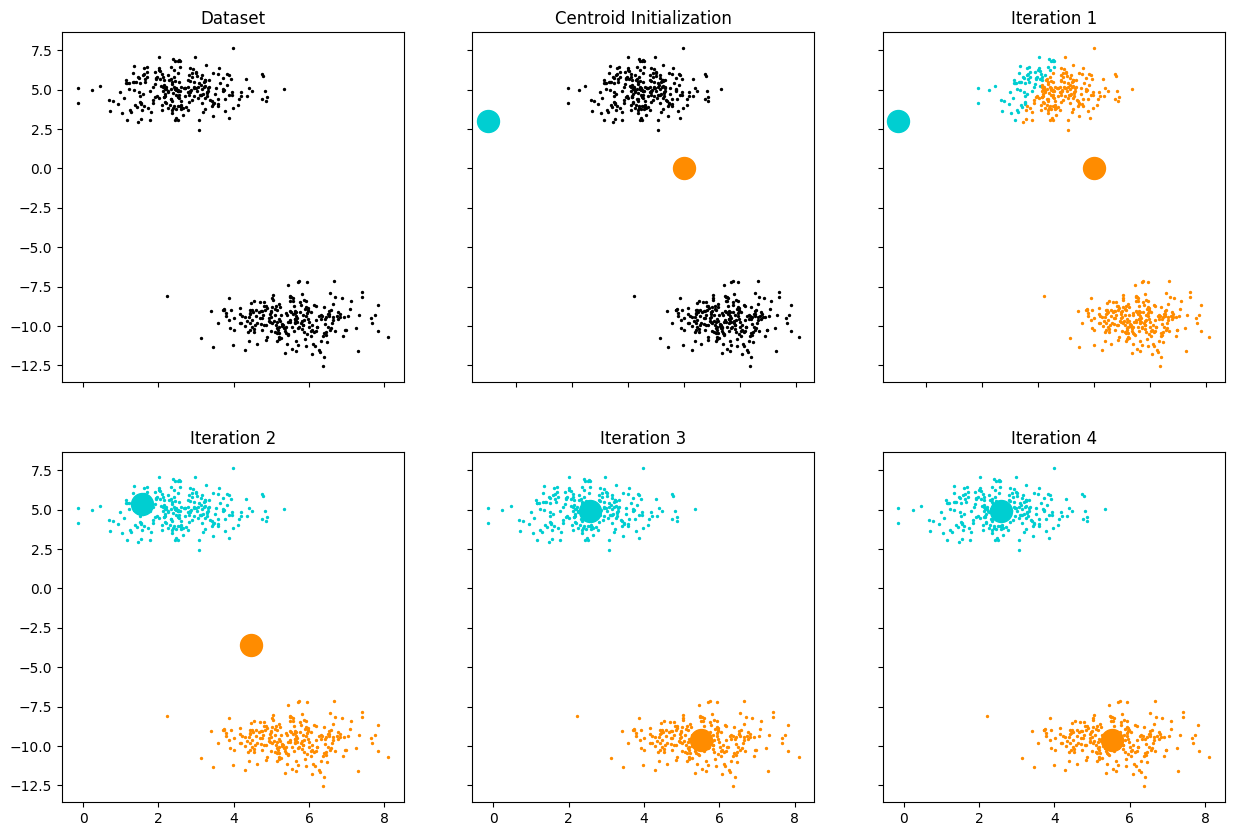

In [33]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

np.random.seed(1)
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

With different number of clusters.

In [34]:
# Generating Synthetic Data

k=5
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (500, 2)
Sample:
[[-7.32786741  4.23641465]
 [ 1.12565931  6.32088416]
 [-0.49239887 -5.28550826]
 [-7.12432134  6.16236021]
 [ 2.38696269  4.11331935]]


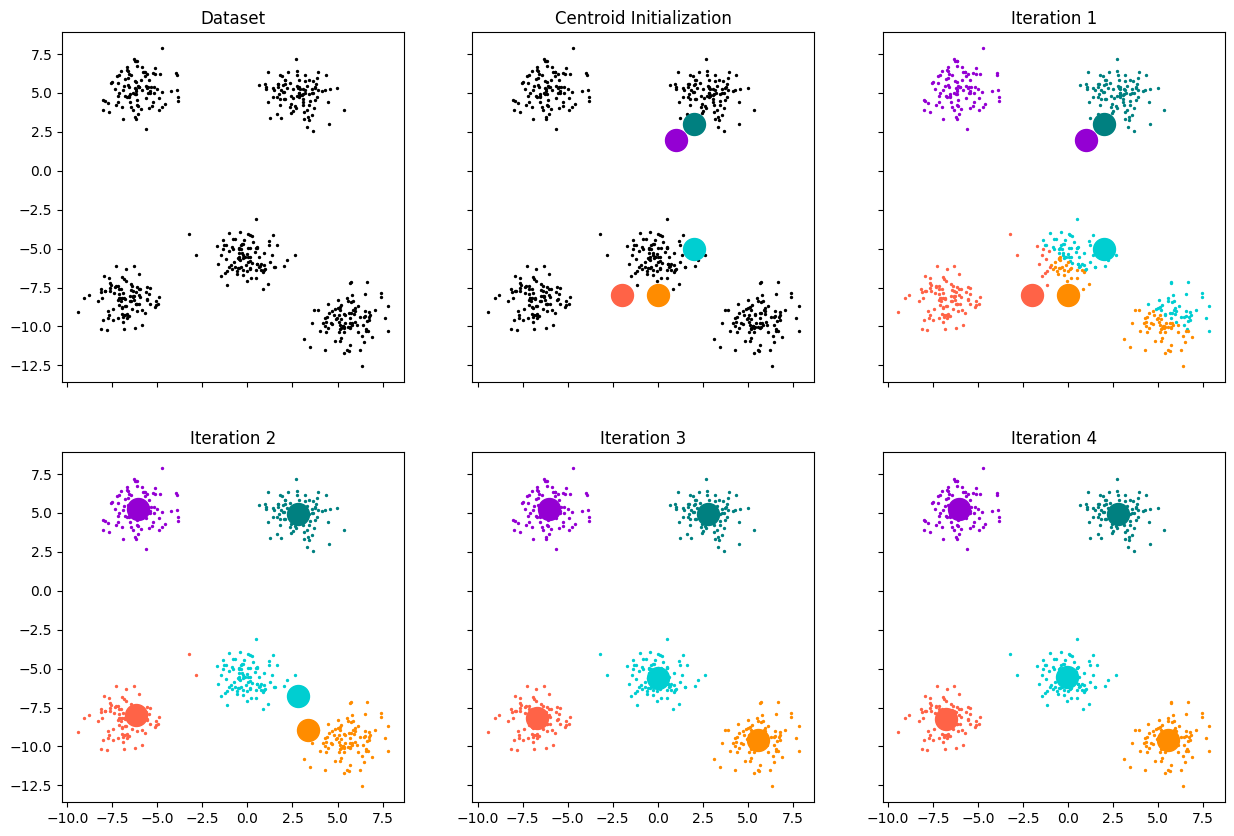

In [35]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

## Change initialization here to 'np.random.seed(0)'
np.random.seed(3)
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [36]:
from copy import deepcopy

def run_kmeans(k, X):
  initializeClusterCentroids()
  assignPointsToCluster(clusters, X)
  while (True):
    prev_clusters = deepcopy(clusters)
    updateCluster(clusters)
    assignPointsToCluster(clusters, X)
    if prev_clusters == clusters:
      break
  return clusters

# Kmeans in scikit-learn

In [37]:
from sklearn.cluster import KMeans

kmeans_demo = KMeans(n_clusters=5) #random centroid intialization
#kmeans_demo = KMeans() #What if we dont initialize the number of clusters?
#kmeans_demo = KMeans(n_clusters=5, init='k-means++') #Does smart centroid initialization help?

#Let us fit our synthetic datapoints into the kmeans object
kmeans_demo.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

ITERATIONS TO CONVERGE = 2
CLUSTER CENTROIDS = 
[[ 5.56873506 -9.60861515]
 [-6.06533341  5.2400571 ]
 [-6.78567723 -8.26282547]
 [ 2.78561142  4.93182424]
 [-0.06909909 -5.56399319]]



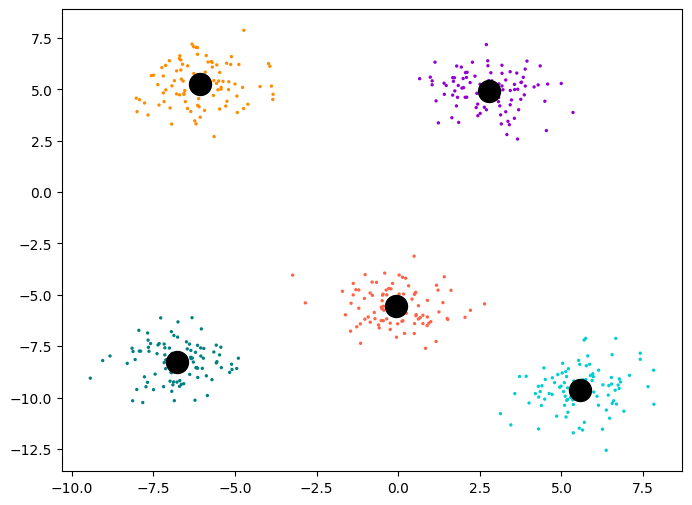

In [38]:
#Lets inspect the clustering model
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo.cluster_centers_))
print()

#using the colours we defined for the clusters at the start
colors_toplot = []
for label in kmeans_demo.labels_:
  colors_toplot.append(color[label])

plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=2)
plt.scatter(kmeans_demo.cluster_centers_[:,0], kmeans_demo.cluster_centers_[:,1], c = 'black', s=250, marker = "o")
plt.gcf().set_size_inches(8,6)
plt.show()

# KMeans on Digits Dataset (KMeans for labelling)

In [39]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [40]:
from sklearn.cluster import KMeans

# Perform KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

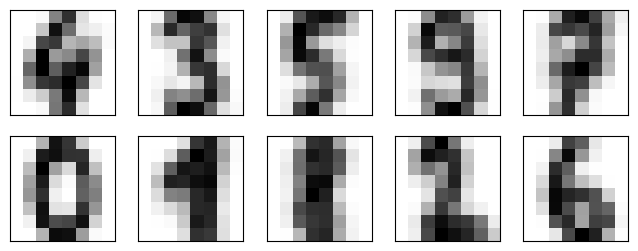

In [41]:
# We can now see how the centers of the clusters formed are

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [42]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

The confusion matrix for

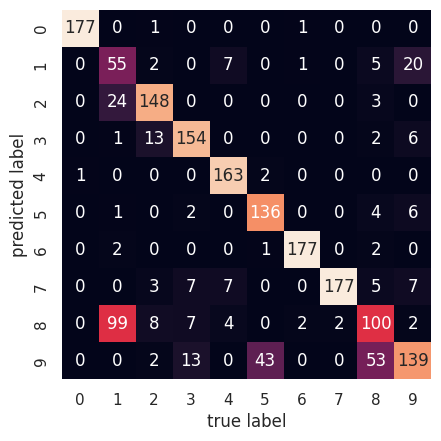

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# KMeans on Iris Dataset (Elbow Method)

In [45]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import datasets

In [46]:
#import the dataset
iris = datasets.load_iris()
# print(iris.data[:10])
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x = df.iloc[:, [0,1,2,3]].values
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Start with assigning the initial number of clusters as k=5.

In [47]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 3 3 2 3 2 2 3 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 4 0 0 4 2 4 0 4 0
 0 0 3 0 0 0 4 4 3 0 3 4 3 0 4 3 3 0 4 4 4 0 3 3 4 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

This graph generally ends up shaped like an elbow, hence its name:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

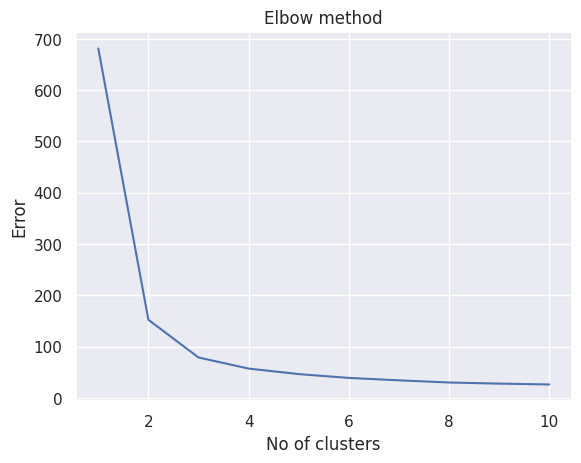

In [48]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The output graph of the Elbow method shows that the shape of elbow is approximately formed at k=3. The optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

In [49]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

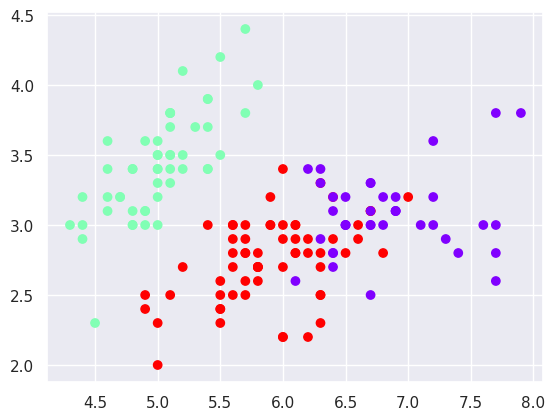

In [50]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans3, cmap='rainbow')

# Hierarchical Clustering


Hierarchical clustering begins with all data points in a single cluster and splits clusters until each data point forms its own cluster.
Both types produce dendrograms that visually represent the merging or splitting of clusters at different heights, reflecting the dissimilarity between data points or clusters.
The choice of distance metric, which measures dissimilarity, is crucial, and common metrics include Euclidean or Manhattan distance.

However, it can be computationally intensive for large datasets, and the selection of linkage methods and distance metrics impacts the results.

# Need for hierarchical clustering :

Hierarchical clustering is a clustering technique used in data analysis and pattern recognition, and it serves several needs and purposes in various domains. Here are some reasons why hierarchical clustering is valuable:

1. **Hierarchy Exploration:**

  Hierarchical clustering organizes data into a tree-like structure, known as a dendrogram. This hierarchy allows users to explore relationships between data points at different levels of granularity. This can be beneficial in gaining insights into the natural hierarchy present in the data.

2. **No Predefined Number of Clusters:**

  Unlike some other clustering methods like K-means, hierarchical clustering does not require specifying the number of clusters beforehand. This flexibility can be advantageous when the optimal number of clusters is not known in advance or when the data does not conform to a fixed number of clusters.

3. **Visual Representation:**

  The dendrogram generated by hierarchical clustering provides a visual representation of the relationships between data points. This visual aid makes it easier for analysts to interpret the clustering results and identify patterns or structures within the data.

4. **Flexibility in Cluster Shapes and Sizes:**

  Hierarchical clustering can identify clusters of various shapes and sizes, including non-spherical or elongated clusters. This flexibility is useful when dealing with datasets where clusters may not conform to spherical shapes, which is an assumption made by algorithms like K-means.

5. **Outlier Detection:**

  Hierarchical clustering can be more robust in identifying outliers. Outliers may appear as distinct branches in the dendrogram, making them easier to detect and analyze separately.

6. **Subgroup Identification:**

  In some datasets, hierarchical clustering can help identify natural subgroups or substructures within clusters. This can be particularly useful in fields like biology, where subtypes of diseases or genetic subpopulations may exist.

#  Advantages over KMeans :

Hierarchical clustering and K-means clustering are both popular clustering techniques, but they have distinct characteristics. Here are some advantages of hierarchical clustering over K-means:

1. **No Assumption of Cluster Shape:**

  Hierarchical clustering does not assume that clusters have a specific shape, such as spherical, which is an assumption in K-means. This makes hierarchical clustering more flexible and suitable for datasets where clusters have different shapes or structures.

2. **Hierarchical Structure:**

  Hierarchical clustering produces a natural hierarchy of clusters, represented by a dendrogram. This hierarchy allows for a more detailed exploration of the relationships between data points at different levels. K-means, on the other hand, provides a flat partitioning of the data without a hierarchical structure.

3. **No Predefined Number of Clusters:**

  Hierarchical clustering does not require specifying the number of clusters beforehand, whereas K-means requires the user to predefine the number of clusters (K). This flexibility is advantageous when the optimal number of clusters is unknown or when the data does not conform to a fixed number of clusters.

4. **Outlier Detection:**

  Hierarchical clustering can be more robust in identifying outliers. Outliers may form their own branches in the dendrogram, making them easier to detect and analyze separately. K-means, being sensitive to outliers, may assign them to the nearest cluster, affecting the overall cluster composition.

5. **Cluster Size Variation:**

  Hierarchical clustering can handle clusters of varying sizes, whereas K-means tends to create clusters of roughly equal sizes. In datasets where clusters have significantly different sizes, hierarchical clustering may be more suitable.

6. **No Initial Guess Required:**

  K-means clustering is sensitive to the initial placement of centroids, and different initializations may lead to different results. Hierarchical clustering, being an agglomerative or divisive process, does not require an initial guess and is less influenced by random initialization.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [9]:
# Generate synthetic data with three clusters
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

In [10]:
# Hierarchical Clustering
def plot_dendrogram(model, **kwargs):
    linkage_matrix = linkage(X, method='ward')  # 'ward' linkage minimizes the variance of clusters being merged
    dendrogram(linkage_matrix, **kwargs)

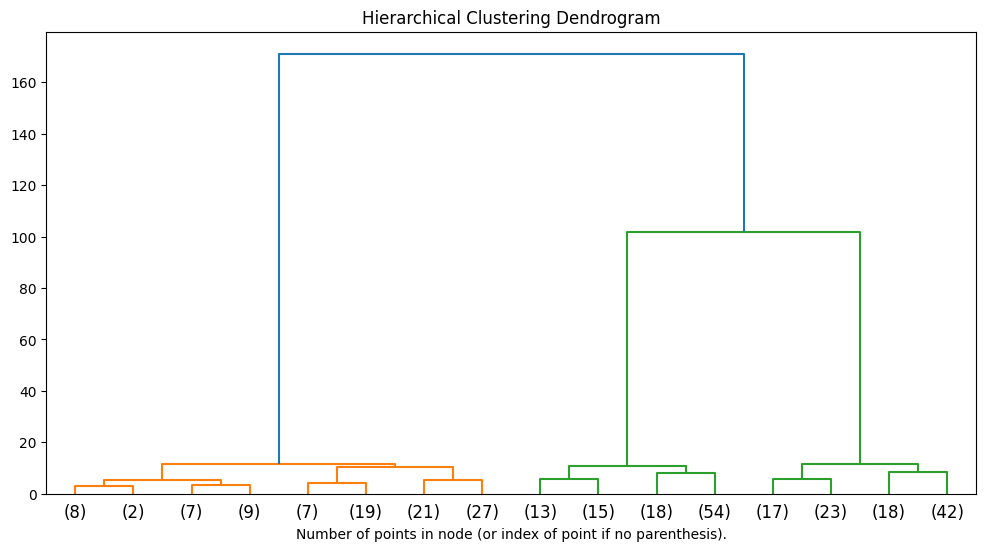

In [11]:
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(AgglomerativeClustering(distance_threshold=0, n_clusters=None), truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [13]:
# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hierarchical Clustering

Text(0.5, 1.0, 'Hierarchical Clustering')

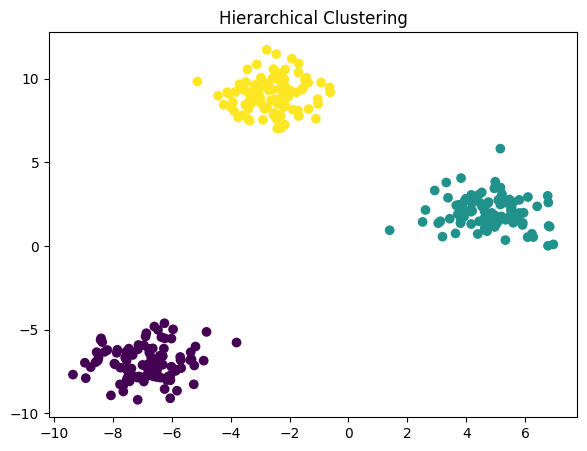

In [14]:
# Plotting the results
plt.figure(figsize=(15, 5))

# Hierarchical Clustering
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=AgglomerativeClustering(n_clusters=3).fit_predict(X), cmap='viridis')
plt.title('Hierarchical Clustering')

K-means Clustering

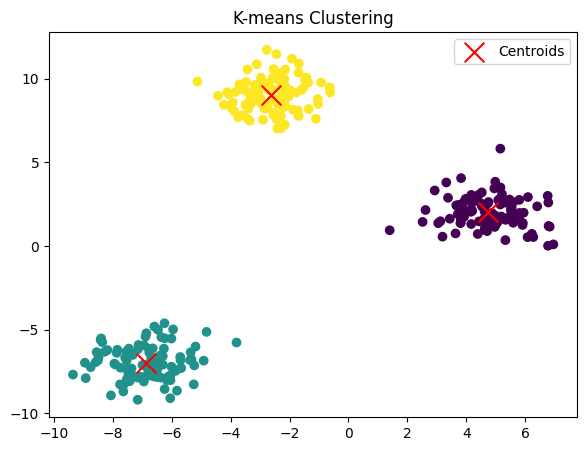

In [20]:
# K-means Clustering
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.legend()

plt.show()

# Advantages of Density Based Clustering over KMeans :

Density-based clustering algorithms, such as DBSCAN (Density-Based Spatial Clustering of Applications with Noise), have several advantages over traditional centroid-based methods like K-means. Here are some key advantages of density-based clustering over K-means:

1. **Handling Irregularly Shaped Clusters:**

  Density-based clustering methods can effectively identify clusters of arbitrary shapes, including irregularly shaped and non-convex clusters. K-means, which assumes clusters to be spherical and equally sized, may struggle with such complex cluster shapes.

2. **No Assumption of Cluster Number:**

  Density-based clustering algorithms do not require the user to specify the number of clusters beforehand, unlike K-means. This is particularly advantageous when the true number of clusters is unknown or when clusters have varying shapes and densities.

3. **Robust to Outliers:**

  Density-based methods are more robust to outliers and noise in the data. Outliers are treated as noise and are not assigned to any cluster, allowing for more accurate identification of the main dense regions in the data. K-means can be sensitive to outliers and may be influenced by their presence.

4. **Flexibility in Cluster Size and Density:**

  DBSCAN can handle clusters of different sizes and densities. It identifies clusters based on local density variations rather than assuming that clusters have similar densities. In contrast, K-means assumes clusters to have roughly equal sizes and densities.

5. **Variable Cluster Shape Detection:**

  Density-based methods are capable of identifying clusters with varying shapes and sizes, adapting to the local density of the data. This makes them suitable for datasets where clusters may have different characteristics.

6. **Automatic Noise Handling:**

  DBSCAN automatically identifies and labels data points as noise, which are not assigned to any cluster. This can be beneficial in real-world datasets where noise or outliers are common. K-means, on the other hand, may be sensitive to outliers and might assign them to clusters.

7. **No Dependency on Initial Seed Selection:**

  DBSCAN does not depend on the initial selection of cluster centroids, which is a critical factor in K-means. The performance of K-means can be influenced by the random initialization of cluster centers, and different initializations may lead to different results.

8. **Adaptable to Data Density Variations:**

  DBSCAN adapts well to variations in data density. It can effectively identify sparse and dense regions in the dataset without assuming a global density parameter. K-means, on the other hand, treats all regions equally and may struggle with varying densities.

**Conclusion:**

  In summary, density-based clustering methods provide a more flexible and robust approach to clustering, particularly when dealing with datasets containing complex shapes, varying densities, and unknown numbers of clusters. The advantages of density-based clustering make it a valuable tool in exploratory data analysis and clustering scenarios where the characteristics of the data are not well-defined in advance.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

In [22]:
# Generate synthetic data with two crescent-shaped clusters
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Standardize the data for DBSCAN
X_std = StandardScaler().fit_transform(X)

In [23]:
# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
# Plotting the results
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

K-means clustering

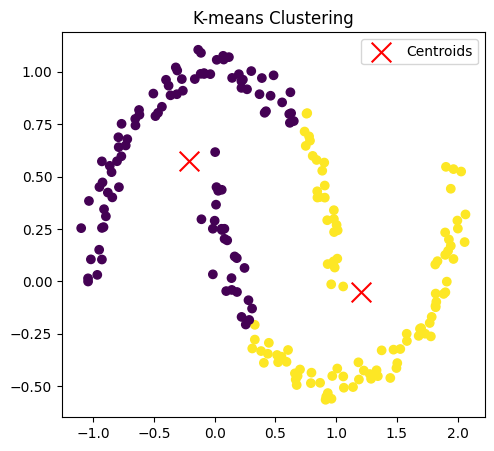

In [26]:
# Plotting the results
plt.figure(figsize=(12, 5))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.legend()


DBSCAN clustering

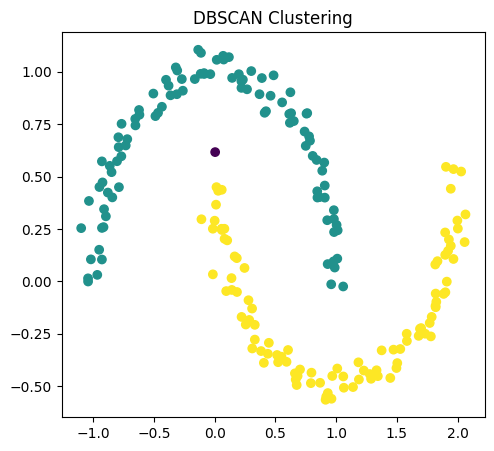

In [28]:
# Plotting the results
plt.figure(figsize=(12, 5))
# DBSCAN clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()